# Using the COGITATE iEEG data 
In this notebook, we will demonstrate how to perform simple basic operation on the iEEG data of the COGITATE consortium. 
This includes applying our preprocessing pipelines to generate epoched data, as well as simple analysis such as onset 
responsiveness and decoding. 


In [1]:
# Setting all modules:
from pathlib import Path
import mne
import numpy as np
import matplotlib.pyplot as plt

from PreprocessingMaster import preprocessing
from OnsetResponsiveness import onset_responsiveness
from Decoding import decoding

## Downloading the BIDS converted data
The first step consists in downloading the data using rest API calls. The interface with XNAT enables filtering of participants,
enabling you to select subjects according to various criterion such as age, gender and various other demographic information. 
For the current example we will simply show you how to download XXXX

In [2]:
bids_root = "C://Users//alexander.lepauvre//Documents//GitHub//iEEG-data-release//bids"

## Running the preprocessing
Now that the BIDS converted data are donwloaded, we can run the preprocessing pipeline. To do so, we will use the preprocessing 
function from the COGITATE. This function takes two arguments: a config file and a subject list. The config file is a json file
containing all parameters required to perform the preprocessing. For the purpose of this tutorial, we will use the default config,
which is the same as the preprocessing pipeline described here: 

If you wish to change the preprocessing pipeline, we recommend you create a copy of the default config and change it according 
to your needs. You can find an extensive documentation of all the parameters here. 

In [ ]:
subjects_list = ["SF102"]
config_file = "PreprocessingParameters_task-Duration_release.json"
preprocessing(config_file, subjects_list, bids_root)

### Visualizing the preprocessed data
The final output of the preprocessing pipeline are the epoched data. The naming conventions of the folders follow the BIDS conventions
You can therefore load the data as follows, and plot a single channel using mne functionalities

Reading C:\Users\alexander.lepauvre\Documents\GitHub\iEEG-data-release\bids\derivatives\preprocessing\sub-SF102\ses-V1\ieeg\epoching\high_gamma\sub-SF102_ses-V1_task-Dur_desc-epoching_ieeg-epo.fif ...
    Found the data of interest:
        t =    -750.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
1440 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1440 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

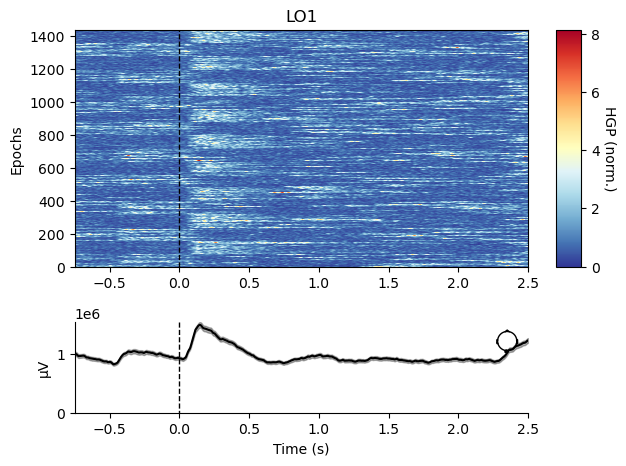

In [8]:
subject = 'SF102'
channel = 'LO1'
example_epochs_path = Path(bids_root, 'derivatives', 'preprocessing',
                           'sub-' + subject, 'ses-' + "V1", 'ieeg',
                           "epoching", 'high_gamma',
                           "sub-{}_ses-{}_task-{}_desc-epoching_{}-epo.fif".format(subject,
                                                                                   "V1", "Dur",
                                                                                   "ieeg"))

epochs = mne.read_epochs(example_epochs_path, preload=True)
mne.viz.plot_epochs_image(epochs, picks=channel, 
                          show=False, units=dict(ecog="HGP (norm.)", seeg="HGP (norm.)"),
                          scalings=dict(ecog=1, seeg=1),
                          evoked=True, cmap="RdYlBu_r")

Notice that the figure above looks odd, with some activation in the baseline. That is because we have data that are epochs relative to both the onset and the offset of the stimuli for different analyses. For most purpose, we would need to select only the epochs locked to stimulus onset. This can be achieved by selecting the epochs by conditions, like so:

Not setting metadata
720 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

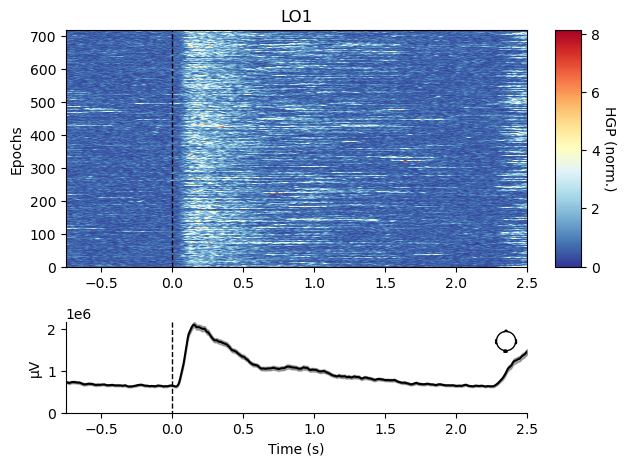

In [13]:
onset_locked_epochs = epochs['stimulus onset']
mne.viz.plot_epochs_image(onset_locked_epochs, picks=channel, 
                          show=False, units=dict(ecog="HGP (norm.)", seeg="HGP (norm.)"),
                          scalings=dict(ecog=1, seeg=1),
                          evoked=True, cmap="RdYlBu_r")

In general, if you wish to extract specific conditions, this data are equipped with forward slash separated strings, enabling you to select any condition by passing the according string or list of strings. Consult the documentation found XXX to find all the conditions
that can be accessed from the data.

Not setting metadata
320 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

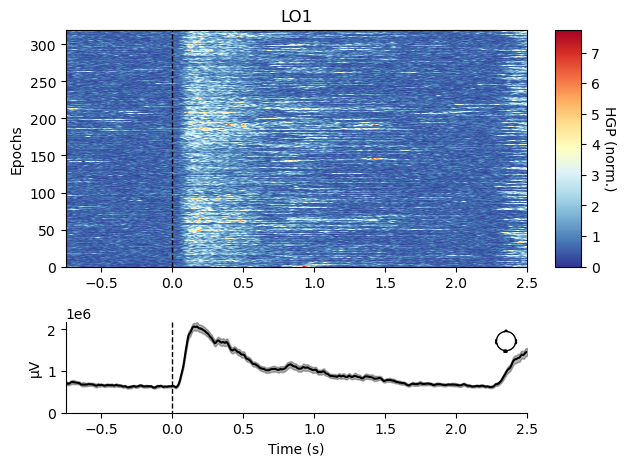

In [14]:
task_relevant_epochs = epochs['stimulus onset/Relevant non-target']
mne.viz.plot_epochs_image(task_relevant_epochs, picks=channel, 
                          show=False, units=dict(ecog="HGP (norm.)", seeg="HGP (norm.)"),
                          scalings=dict(ecog=1, seeg=1),
                          evoked=True, cmap="RdYlBu_r")

Not setting metadata
26 matching events found
No baseline correction applied
0 projection items activated


[<Figure size 640x480 with 4 Axes>]

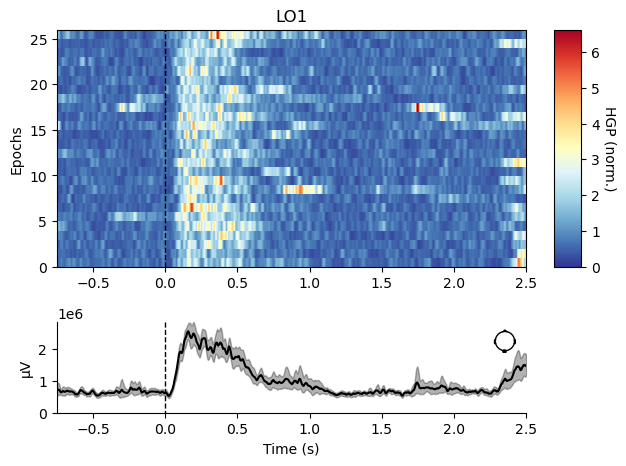

In [15]:
task_relevant_face_short_epochs = epochs['stimulus onset/Relevant non-target/face/500ms']
mne.viz.plot_epochs_image(task_relevant_face_short_epochs, picks=channel, 
                          show=False, units=dict(ecog="HGP (norm.)", seeg="HGP (norm.)"),
                          scalings=dict(ecog=1, seeg=1),
                          evoked=True, cmap="RdYlBu_r")

## Onset responsiveness
Now that the data were preprocessed, we can apply the onset responsiveness analysis, which consists in comparing single channel
activaition before and after visual stimuli onsets, using a simple paired t-test. This enables determining which are the 
channels which are responsive to our task in general.

This can be done using the function called onset_responsiveness, which takes again 3 inputs: a config json file, a subject list 
and the bids root. This function will loop through each subject and channel to perform the analysis. The results will be 
saved to a csv file. In addition, every single channel will be plotted in separate sub-folders (if the option is activation 
plot_single_channel to true). Note that the plotting can take a long time, so you might want to deactivate it if you want to run
quickly.

In [16]:
subjects_list = ["SF102"]
config_file = "OnsetResponsiveness_task-Duration_release.json"
results = onset_responsiveness(config_file, subjects_list, bids_root,
                                   plot_single_channels=False, plot_only_responsive=False)

----------------------------------------
Welcome to Onset Responsiveness!
The onset responsive channels of the following subjects will be determined: 
['SF102']
Using the config file:
OnsetResponsiveness_task-Duration_release.json
If you have the plotting options on, it will take some time!
----------------------------------------
Onset responsiveness SF102 with config file OnsetResponsiveness_task-Duration_release.json
Reading C:\Users\alexander.lepauvre\Documents\GitHub\iEEG-data-release\bids\derivatives\preprocessing\sub-SF102\ses-V1\ieeg\epoching\high_gamma\sub-SF102_ses-V1_task-Dur_desc-epoching_ieeg-epo.fif ...
    Found the data of interest:
        t =    -750.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
1440 matching events found
No baseline correction applied
0 projection items activated


### Investigate the results
Now that we have ran the onset responsiveness analysis, we can provide some summary statistics for the 
data. 

----------------------------------------
46 out of 92 (50.0%) were found to be onset responsive!


<Axes: xlabel='reject'>

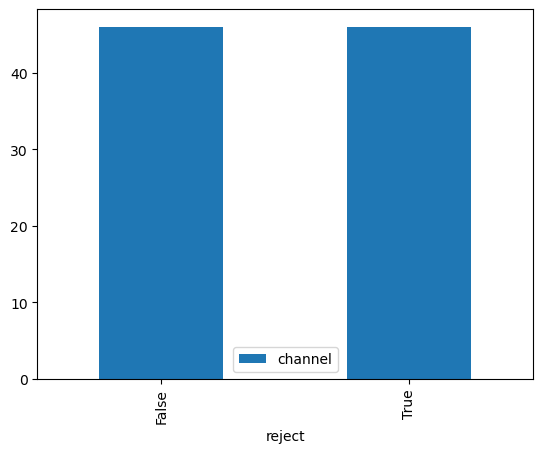

In [17]:
# Channels counts:
channels_counts = results.groupby("reject").count().reset_index()[["reject", "channel"]]
# Print the counts:
print('-'*40)
print("{} out of {} ({}%) were found to be onset responsive!".format(
    channels_counts.loc[channels_counts['reject'] == True, 'channel'].item(), len(results),
    channels_counts.loc[channels_counts['reject'] == True, 'channel'].item() / len(results) * 100))
# Plot the results as a bar graph:
channels_counts.plot.bar(x="reject", y="channel")


We can also further investigate the results by looking at each subject separately:

  subject  reject  channel
0   SF102   False       46
1   SF102    True       46


<Axes: >

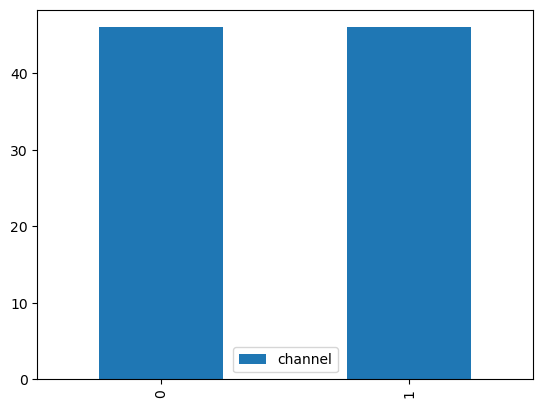

In [19]:
subjects_channels_counts = results.groupby(["subject", "reject"]).count().reset_index()[["subject", "reject", "channel"]]
# Print the counts:
print(subjects_channels_counts)
# Plot the results as a bar graph:
subjects_channels_counts.plot.bar()

### Plotting responsive channels on the brain surface
One important sanity check is to make sure that the localization of the effects make sense. As 
the task in the COGITATE was visual, one would expect to find a lot of onset responsive electrodes
over the posterior cortex. To check whether that is the case, we will extract only the onset responsive
electrodes that we hve identified above and we will plot that on the pial surface. 

This step require MNE setup to have been performed as to allow 3D rendering. Consult the MNE webpage: XXX

In [ ]:
# Extract the onset responsive electrodes:
onset_responsive_results = results.loc[results["reject"] == True]
# Get these channels localization in MNI space:
responsive_channels_mni = get_channels_mni_coordinates(onset_responsive_results["channel"].to_list(), 
                                                                bids_root)
# Once we have the channels localizations, we can create a dig montage for a "super subject":


Additionally, not only do we expect more channels to be responsive in posterior regions, we also expect the effects to be stronger. To vizualize this, you can plot the effect sizes of the onset
responsiveness on the brain.

In [ ]:
effect_sizes = onset_responsive_results["effect_size"].to_list()
rgba = colormaps.get_cmap("RdYlBu_r")
sensor_colors = np.array(gamma_power_at_15s.map(rgba).tolist(), float)
fig = plot_alignment(
    raw.info,
    trans="fsaverage",
    subject="fsaverage",
    subjects_dir=subjects_dir,
    surfaces=["pial"],
    coord_frame="head",
    sensor_colors=sensor_colors,
)

mne.viz.set_3d_view(fig, azimuth=0, elevation=70, focalpoint="auto", distance="auto")

xy, im = snapshot_brain_montage(fig, raw.info)

## Decoding
In addition to investigate the univariate responses of every single channel, we can also performed a multivariate analysis, investigating the presence of representation of particular contrasts of interests across the electrodes in our sample. In the current example, we will
use support vector machine to decode faces vs. objects across all electrodes within each single
subject. Once again, we will use a function taking three input: a config file, a list of subjects
and the bids root:

In [3]:
subjects_list = ["SF102"]
config_file = "Decoding_task-Duration_release.json"
scores = decoding(config_file, subjects_list, bids_root)

----------------------------------------
Welcome to Decoding!
The onset responsive channels of the following subjects will be determined: 
['SF102']
Using the config file:
Decoding_task-Duration_release.json
----------------------------------------
Decoding SF102 with config file Decoding_task-Duration_release.json
Reading C:\Users\alexander.lepauvre\Documents\GitHub\iEEG-data-release\bids\derivatives\preprocessing\sub-SF102\ses-V1\ieeg\epoching\high_gamma\sub-SF102_ses-V1_task-Dur_desc-epoching_ieeg-epo.fif ...
    Found the data of interest:
        t =    -750.00 ...    2500.00 ms
        0 CTF compensation matrices available
Adding metadata with 9 columns
1440 matching events found
No baseline correction applied
0 projection items activated
Decoding category with 5 folds stratified cross validation:


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   10.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   13.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   16.6s finished


We can now plot the results averaged across participants

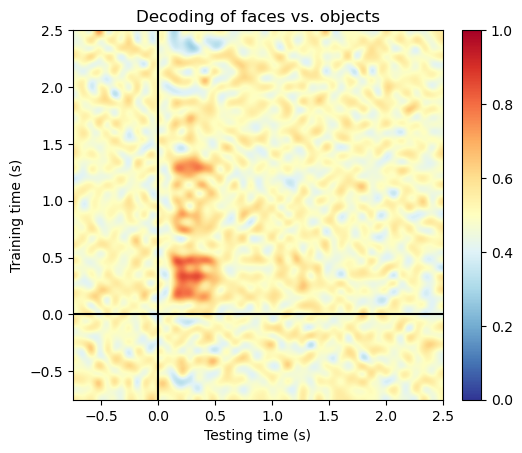

In [9]:
# Plot the results:
fig, ax = plt.subplots()
# Plot matrix with transparency:
im = ax.imshow(np.mean(scores, axis=0), cmap="RdYlBu_r",
               extent=[epochs.times[0], epochs.times[-1], epochs.times[0], epochs.times[-1]],
               origin="lower",  # aspect="equal",
               interpolation="lanczos", vmin=0, vmax=1)
# Add the axis labels and so on:
ax.set_xlim([epochs.times[0], epochs.times[-1]])
ax.set_ylim([epochs.times[0], epochs.times[-1]])
ax.set_xlabel("Testing time (s)")
ax.set_ylabel("Training time (s)")
ax.set_title("Decoding of {}".format("faces vs. objects"))
ax.axvline(0, color='k')
ax.axhline(0, color='k')
fig.colorbar(im, fraction=0.046, pad=0.04)

We can also plot the diagonal, i.e. the time resolved decoding

Text(0, 0.5, 'roc_auc')

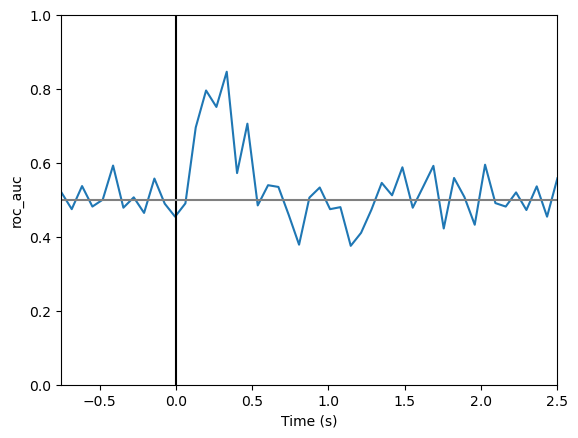

In [26]:
    fig, ax = plt.subplots()
    times = np.linspace(epochs.times[0], epochs.times[-1], scores[0].shape[0])
    ax.plot(times, np.diag(np.mean(scores, axis=0)))
    ax.set_xlim([epochs.times[0], epochs.times[-1]])
    ax.set_ylim([0, 1])
    ax.axvline(0, color='k')
    ax.axhline(0.5, color=[0.5, 0.5, 0.5])
    ax.set_xlabel("Time (s)")
    ax.set_ylabel("roc_auc")